## Лабораторная работа №1 | Вариант 5

Выполнил: Бурунов Михаил Андреевич

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
# Надеюсь правильно понял задание
rgba_dtype = np.dtype([
    ('red', np.uint8),
    ('green', np.uint8),
    ('blue', np.uint8),
    ('alpha', np.uint8)  # альфа-канал
])
# используем так
color = np.array([(255, 0, 0, 255), (0, 255, 0, 128), (0, 0, 255, 64)], dtype=rgba_dtype)
color


array([(255,   0,   0, 255), (  0, 255,   0, 128), (  0,   0, 255,  64)],
      dtype=[('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1')])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
data = np.random.random(1000).reshape(10, 10,10) * np.nan  # Создадим, например, массив со значениями NaN

np.seterr(all="ignore")
# Функция seterr используется для управления предупреждениями. 
# Здесь all='ignore' помогает игнорировать любые типы предупреждений, 
# с которыми мы можем столкнуться. Вообще, это может быть полезно, 
# если хотим сосредоточиться на результатах вычислений, не отвлекаясь на предупреждающие сообщения.


np.nanmedian(data, axis=[1, 2])
# Теперь давайте выполним операцию, которая обычно вызывает предупреждение, 
# когда мы вычисляем медиану массива данных по указанным осям. Однако из-за функции seterr она игнорируется. 
# Мы увидим вывод приведенного выше кода только без предупреждения при последнем запуске.


C:\Users\vimi\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
random_vector = np.sort(np.random.rand(10))
random_vector

array([0.03367309, 0.22079209, 0.28001719, 0.60944656, 0.68032639,
       0.70735284, 0.80210534, 0.85780351, 0.89334118, 0.95781879])

5. Создайте read-only массив(неизменяемый)

In [7]:
arr = np.array([1, 2, 3, 4, 5])

arr.setflags(write=False) # здесь меняем флаг write на False, отключая возможность изменения массива 

# Проверим
try:
    arr[0] = 10
except ValueError as e:
    print(f"Ошибка: {e}")

Ошибка: assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [8]:
arr = np.random.normal(size=(10, 2))
# ρ=sqrt(x^2+y^2), tg(φ)=y/x => φ=arctg(x/y)
# Нам, получается, нужны параметры ρ и φ:

r = np.sqrt(arr[:, 0]**2 + arr[:, 1]**2)

fi = np.arctan2(arr[:, 1], arr[:, 0]) 
# обычная функция arctan(y / x) может работать некорректно, ибо у нас может быть x, равный нулю. 
# Есть специальная функция arctan2 для таких вот вычислений

#Дальше просто оформляем красиво, объединив два массива
polar = np.column_stack((r, fi))
polar

array([[ 0.67228965,  0.60199887],
       [ 1.42757992,  2.23099084],
       [ 1.35903851,  2.12919328],
       [ 1.12794405, -2.94713434],
       [ 0.38508289,  0.99994995],
       [ 0.73921687, -2.9701366 ],
       [ 1.08570084, -0.15663991],
       [ 0.80366547, -0.24134889],
       [ 0.65741537, -3.0368314 ],
       [ 1.0495094 , -1.88984492]])

7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [9]:
# Не совсем понимаю, что такое 'структурированный' массив, но вроде так

dtype = np.dtype([('x', np.float64), ('y', np.float64)])

# Генерируем координаты x и y, охватывающие область [0, 1]x[0, 1]. Я решил брать по 10 точек
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

# Создаем сетку координат (тут использую meshgrid для формирования двумерной сетки координат x и y)
x_grid, y_grid = np.meshgrid(x, y)
# print(x_grid, "\nsd\n", y_grid)
array = np.zeros(x_grid.shape, dtype=dtype) # Создаём конечный массив
# Наполняем его
array['x'] = x_grid
array['y'] = y_grid
print(array)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        ) (0.55555556, 0.        )
  (0.66666667, 0.        ) (0.77777778, 0.        )
  (0.88888889, 0.        ) (1.        , 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111) (0.55555556, 0.11111111)
  (0.66666667, 0.11111111) (0.77777778, 0.11111111)
  (0.88888889, 0.11111111) (1.        , 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222) (0.55555556, 0.22222222)
  (0.66666667, 0.22222222) (0.77777778, 0.22222222)
  (0.88888889, 0.22222222) (1.        , 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333) (0.55555556, 0.33333333)
  (0.66666667, 0.33333333) (0.77777778, 0.33333333)
  (0.8888

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [10]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

# без выпендрёжа))
c = np.zeros((5, 5))
for i in range(5):
    for u in range(5):
        if x[i] == y[u]:
            c[i][u] = 0  
        else:
            c[i][u] = 1 / (x[i] - y[u])

c

array([[ 5.11059131,  0.6131437 ,  0.47243967,  2.50529893,  0.39218656],
       [-1.25527851,  1.56584945,  0.88939143, -1.68590262,  0.64205503],
       [-0.99559317,  2.32104391,  1.09101943, -1.24852604,  0.74090071],
       [-1.45039173,  1.34084555,  0.81199717, -2.05766814,  0.60072112],
       [-1.04570487,  2.08779515,  1.03658359, -1.32835488,  0.71538839]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [11]:
# допустим есть какой-то массив вещественных чисел
arr = np.array([1.5, 2.3, 3.7, 4.1], dtype=np.float32)
# применяем функцию astype
arr = arr.astype(np.int32)
arr

array([1, 2, 3, 4])

10. Как случайно заменить p элементов в 2D массиве?

In [12]:
# Количество элементов для замены
p = 5
# размерность массива(пусть будет NxN)
n = 10
# двумерный массив
arr = np.random.randint(0, 100, size=(n, n))
print("Изначальный массив:\n", arr)

# Генерирую случайные индексы без повторений
x_index = np.random.choice(n, size=p, replace=False) # replace=False - позволяет создать массив без повторений
y_index = np.random.choice(n, size=p, replace=False)

new_values = np.random.randint(0, 100, size=p) # Новые значения

print(f"Индексы замен:\n {np.column_stack((x_index, y_index))}\nНовые значения:\n{new_values}")

arr[x_index, y_index] = new_values
print("Измененный массив:\n", arr)


Изначальный массив:
 [[30  6 93  3 93 25 94 23 36  9]
 [33  7 77 67 80 48 74 54 78 84]
 [72 15 39 89 15 86 93 28 22 96]
 [99 19 45 14 68 58 26 49 92 30]
 [95 30  5 89 79 30 29 18 98 18]
 [13 99 49 26 39 61 85 67 82 90]
 [36 53 97 14 36 18 53 91 67 97]
 [55 32 45 28 86 18 26 10 34 84]
 [76  6 88 42 30 16 44  8 56 52]
 [64 50 83 26 49 84 75 29 29 15]]
Индексы замен:
 [[5 3]
 [8 9]
 [2 2]
 [1 6]
 [0 4]]
Новые значения:
[46 10 24 67 89]
Измененный массив:
 [[30  6 93  3 89 25 94 23 36  9]
 [33  7 77 67 80 48 67 54 78 84]
 [72 15 24 89 15 86 93 28 22 96]
 [99 19 45 14 68 58 26 49 92 30]
 [95 30  5 89 79 30 29 18 98 18]
 [13 99 49 46 39 61 85 67 82 90]
 [36 53 97 14 36 18 53 91 67 97]
 [55 32 45 28 86 18 26 10 34 84]
 [76  6 88 42 30 16 44  8 56 10]
 [64 50 83 26 49 84 75 29 29 15]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [13]:
import pandas as pd

In [14]:
# Load dataset here
df = pd.read_csv("data.csv")

1. Узнайте сколько было на борту человек

In [15]:
print(df.shape[0])

418


2. Какой медианный и средний возраста пассажиров

In [16]:
print(f"Медианный возраст пассажиров: {int(df['Age'].median())} \nСредний возраст пассажиров: {round(df['Age'].mean())}")

Медианный возраст пассажиров: 27 
Средний возраст пассажиров: 30


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [17]:
# До 16 лет включительно?
# Предположу, что нет) Тогда считаем пассажира взрослым, если ему исполнилось 16
print(f"Выживаемость взрослых: {round(df[df['Age'] >= 16]['Survived'].mean() * 100, 1)}%")
print(f"Выживаемость детей: {(df[df['Age'] < 16]['Survived'].mean() * 100):.2f}%")

Выживаемость взрослых: 38.0%
Выживаемость детей: 40.62%


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [18]:
# Добавлю для упрощения кода категорию детей
df['IsChild'] = df['Age'] < 16

women = df[(df['Sex'] == 'female') & (df['IsChild'] == False)]
men = df[(df['Sex'] == 'male') & (df['IsChild'] == False)]
children = df[df['IsChild'] == True]

# Процент выживаемости для каждой группы
women_survival_rate = women['Survived'].mean() * 100
children_survival_rate = children['Survived'].mean() * 100
men_survival_rate = men['Survived'].mean() * 100

print(f"Процент выживаемости женщин: {women_survival_rate:.2f}%")
print(f"Процент выживаемости детей: {children_survival_rate:.2f}%")
print(f"Процент выживаемости мужчин: {men_survival_rate:.2f}% - Это печально, очень")

# Получается гипотеза верна, ведь среди женщин и детей хотя бы есть выжившие...  
# Процент выживаемости женщин: 100.00%
# Процент выживаемости детей: 40.62%
# Процент выживаемости мужчин: 0.00%

Процент выживаемости женщин: 100.00%
Процент выживаемости детей: 40.62%
Процент выживаемости мужчин: 0.00% - Это печально, очень


5. Зависит ли выживаемость от класса обслуживания?

In [19]:
# Выживаемость среди женщин, детей и мужчин в разных классах
women_by_class = women.groupby('Pclass')['Survived'].mean() * 100
children_by_class = children.groupby('Pclass')['Survived'].mean() * 100
men_by_class = men.groupby('Pclass')['Survived'].mean() * 100

print("\nПроцент выживаемости женщин по классам:")
print(women_by_class)
print("\nПроцент выживаемости детей по классам:")
print(children_by_class)
print("\nПроцент выживаемости мужчин по классам:")
print(men_by_class)

# Зависит, судя по проценту выживаемости детей


Процент выживаемости женщин по классам:
Pclass
1    100.0
2    100.0
3    100.0
Name: Survived, dtype: float64

Процент выживаемости детей по классам:
Pclass
1     0.000000
2    66.666667
3    33.333333
Name: Survived, dtype: float64

Процент выживаемости мужчин по классам:
Pclass
1    0.0
2    0.0
3    0.0
Name: Survived, dtype: float64


6. Посчитайте средний возраст умерших женщин и мужчин

In [20]:
average_age_dead_women = women["Age"][women["Survived"] == 0].mean()
average_age_dead_men = men["Age"][men["Survived"] == 0].mean()
print("Средний возраст умерших женщин(все выжили):", average_age_dead_women)
print("Средний возраст умерших мужчин:", round(average_age_dead_men))

Средний возраст умерших женщин(все выжили): nan
Средний возраст умерших мужчин: 33


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [21]:
# Добавлю проверку на одиночек:
df['IsAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)


loner_survival_rate = df[df['IsAlone'] == True]['Survived'].mean() * 100
not_loner_survival_rate = df[df['IsAlone'] == False]['Survived'].mean() * 100

print(f"Процент выживаемости одиночек: {loner_survival_rate:.2f}%")
print(f"Процент выживаемости пассажиров-неодиночек: {not_loner_survival_rate:.2f}%")

# Таким образом, различается. Одиночек умерло


Процент выживаемости одиночек: 26.88%
Процент выживаемости пассажиров-неодиночек: 50.91%


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [22]:
avg_price_survivor = df["Fare"][df["Survived"] == 1].mean()
avg_price_unsurvivor = df["Fare"][df["Survived"] == 0].mean()


print(f"Средняя стоимость билета у выживших пассажиров: {avg_price_survivor:.2f}")
print(f"Средняя стоимость билета у умерших пассажиров: {avg_price_unsurvivor:.2f}")

Средняя стоимость билета у выживших пассажиров: 49.75
Средняя стоимость билета у умерших пассажиров: 27.53


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [23]:
second_class_survivors = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

max_age_survivor = second_class_survivors["Age"].max()
min_age_survivor = second_class_survivors["Age"].min()

print(f"Максимальный возраст выживших пассажиров во 2 классе обслуживания: {max_age_survivor}")
print(f"Минимальный возраст выживших пассажиров во 2 классе обслуживания: {min_age_survivor}")

Максимальный возраст выживших пассажиров во 2 классе обслуживания: 60.0
Минимальный возраст выживших пассажиров во 2 классе обслуживания: 0.92


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [24]:
# Не, тут мужчинам не повезло

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возрастов пассажиров

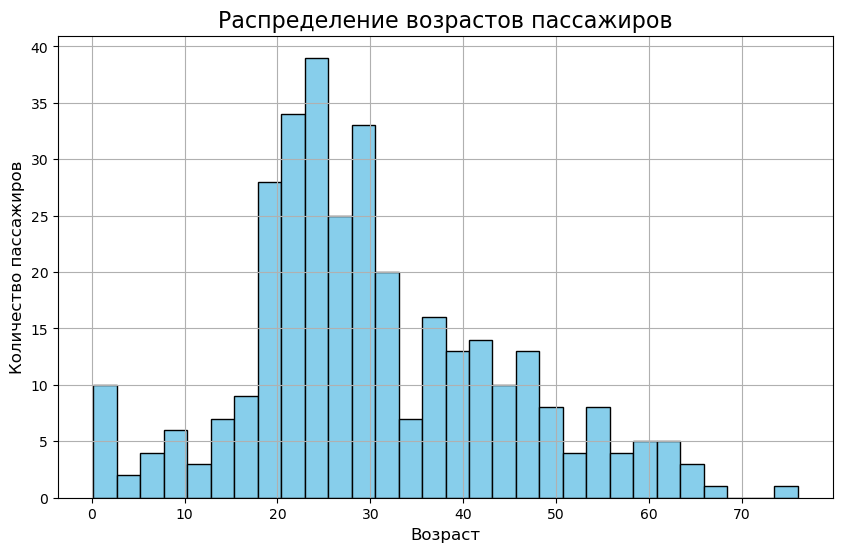

In [25]:
import matplotlib.pyplot as plt

# Построение гистограммы распределения возрастов
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Распределение возрастов пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(True)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

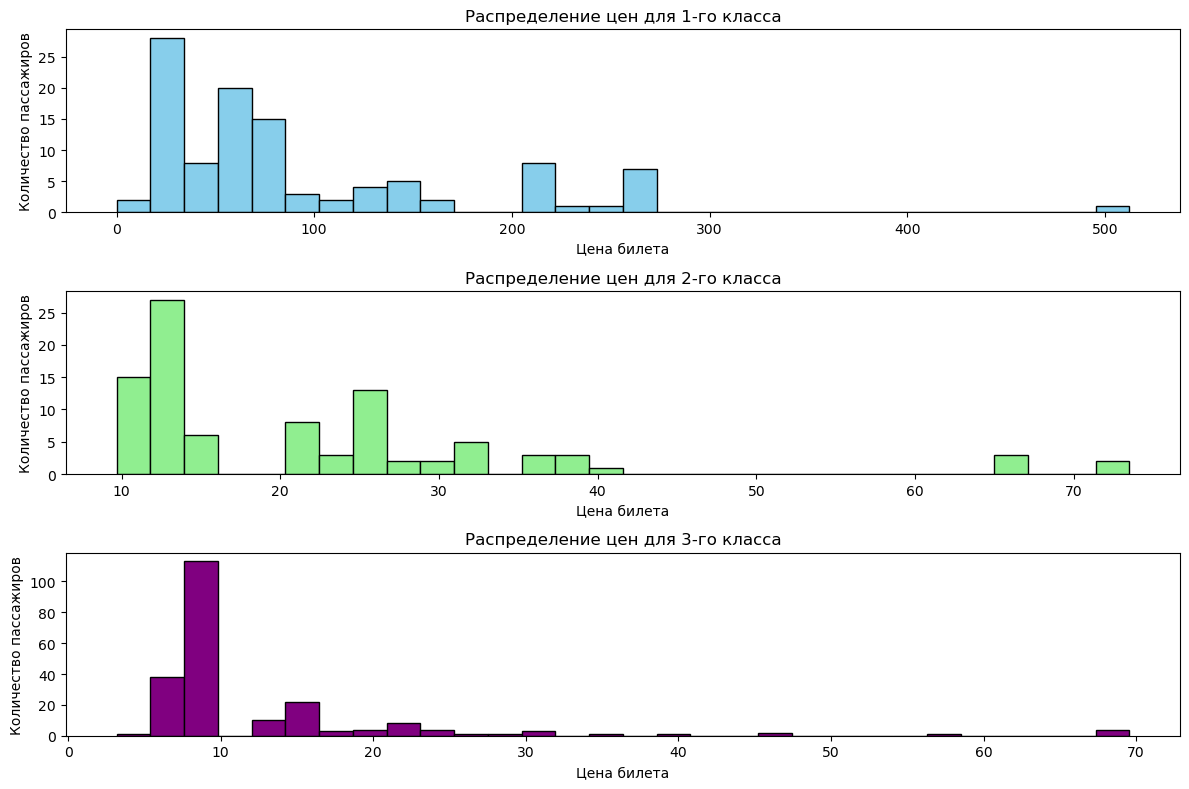

In [26]:
# Настройка фигуры для гистограмм по каждому классу
plt.figure(figsize=(12, 8))

# Построение гистограммы для 1-го класса
plt.subplot(3, 1, 1)
plt.hist(df[df['Pclass'] == 1]['Fare'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Распределение цен для 1-го класса')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

# Построение гистограммы для 2-го класса
plt.subplot(3, 1, 2)
plt.hist(df[df['Pclass'] == 2]['Fare'].dropna(), bins=30, edgecolor='black', color='lightgreen')
plt.title('Распределение цен для 2-го класса')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

# Построение гистограммы для 3-го класса
plt.subplot(3, 1, 3)
plt.hist(df[df['Pclass'] == 3]['Fare'].dropna(), bins=30, edgecolor='black', color='purple')
plt.title('Распределение цен для 3-го класса')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

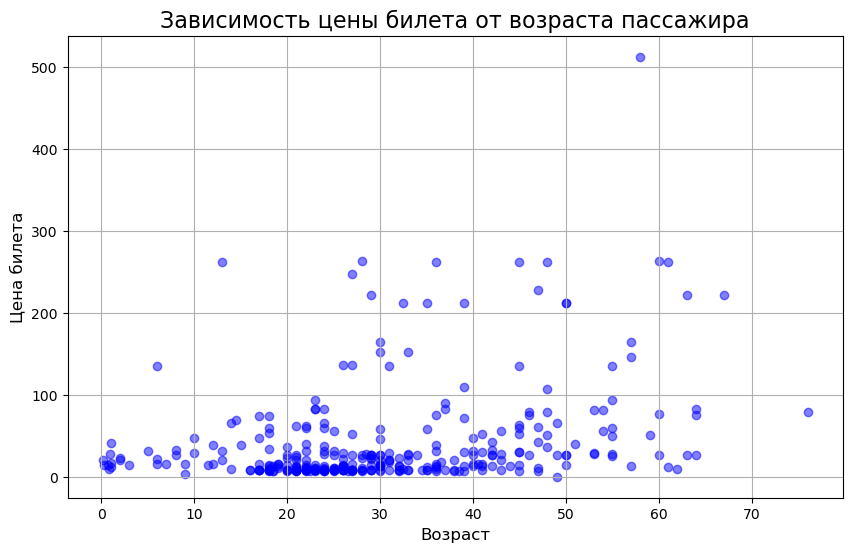

In [27]:
# Построение графика зависимости цены от возраста
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Fare'], alpha=0.5, color='blue')
plt.title('Зависимость цены билета от возраста пассажира', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Цена билета', fontsize=12)
plt.grid(True)
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

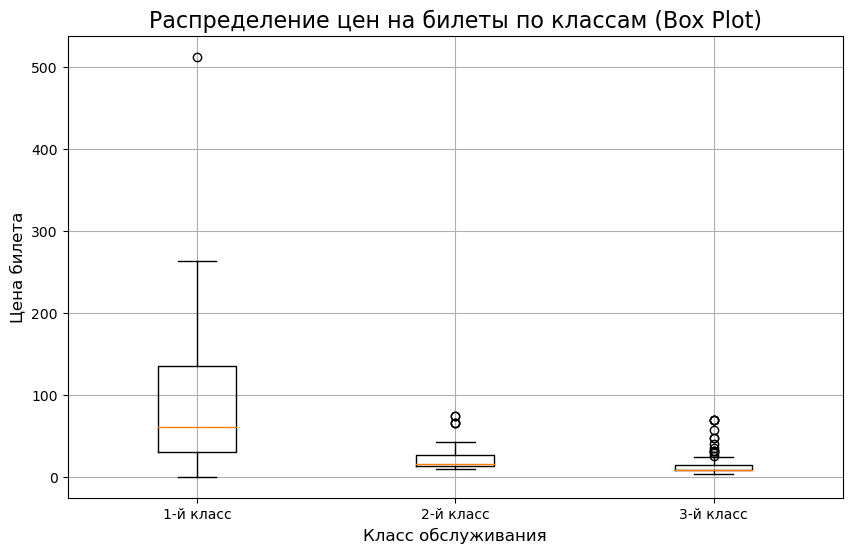

In [28]:
# Построение box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Pclass'] == 1]['Fare'].dropna(),
             df[df['Pclass'] == 2]['Fare'].dropna(),
             df[df['Pclass'] == 3]['Fare'].dropna()],
            labels=['1-й класс', '2-й класс', '3-й класс'])

plt.title('Распределение цен на билеты по классам (Box Plot)', fontsize=16)
plt.xlabel('Класс обслуживания', fontsize=12)
plt.ylabel('Цена билета', fontsize=12)
plt.grid(True)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

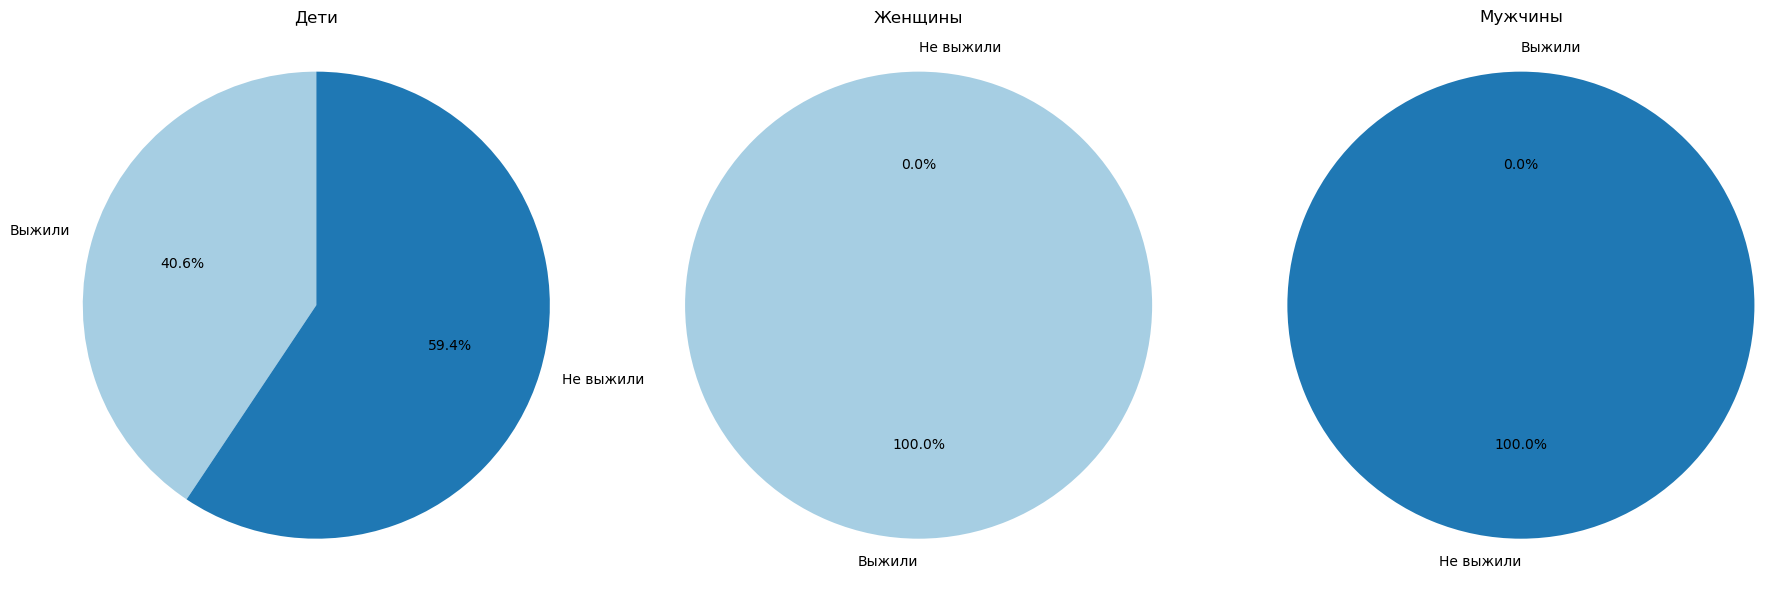

In [29]:
# Создание категорий для детей и взрослых (возраст до 16 лет)
df['Category'] = pd.cut(df['Age'], bins=[0, 16, 100], labels=['Дети', 'Взрослые'], right=False)

# Фильтруем данные по категориям: дети (до 16 лет), женщины и мужчины
children = df[(df['Category'] == 'Дети')]
women = df[(df['Sex'] == 'female') & (df['Category'] == 'Взрослые')]
men = df[(df['Sex'] == 'male') & (df['Category'] == 'Взрослые')]

# Функция для вычисления выживших и погибших
def survival_pie_chart(group, title, ax):
    survived = group['Survived'].sum()
    not_survived = len(group) - survived
    sizes = [survived, not_survived]
    labels = ['Выжили', 'Погибли']
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.axis('equal')
    ax.set_title(title)

# Создаем фигуру с подграфиками
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


survival_pie_chart(children, 'Дети', axs[0])
survival_pie_chart(women, 'Женщины', axs[1])
survival_pie_chart(men, 'Мужчины', axs[2])

# Показываем графики
plt.tight_layout()
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

C:\Users\vimi\AppData\Local\Temp\ipykernel_9136\1177000711.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Выжившие', shade=True, color='green', bw_adjust=1.2)
C:\Users\vimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vimi\AppData\Local\Temp\ipykernel_9136\1177000711.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Умершие', shade=True, color='red', bw_adjust=1.2)
C:\Users\vimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: u

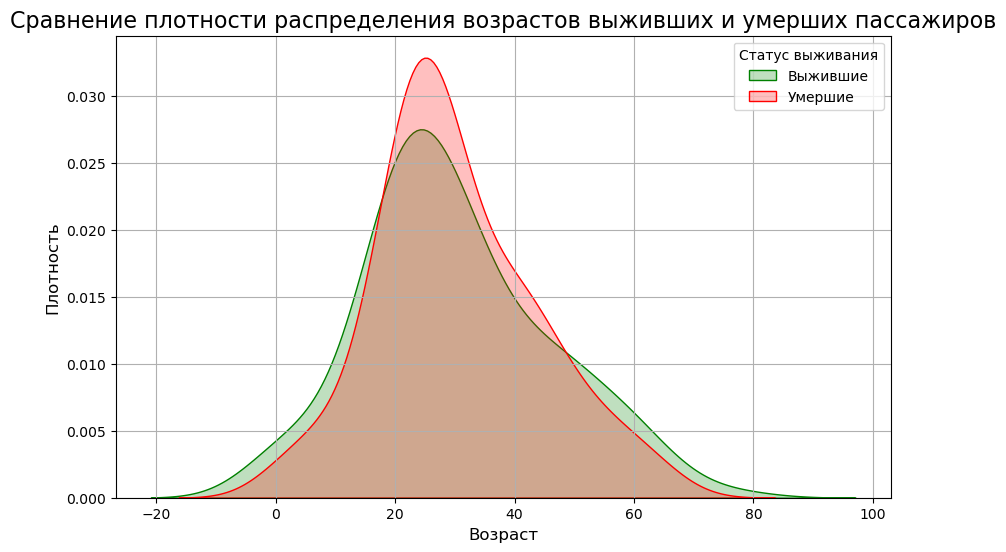

In [32]:
import seaborn as sns

# Построение графиков плотности распределения возрастов для выживших и невыживших
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Выжившие', shade=True, color='green', bw_adjust=1.2)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Умершие', shade=True, color='red', bw_adjust=1.2)

# Настройки графика
plt.title('Сравнение плотности распределения возрастов выживших и умерших пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend(title='Статус выживания')
plt.grid(True)

plt.show()

# Можно сделать вывод, что у детей было больше шансов остаться в живых, чем у взрослых от 19-20 до 45 лет

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

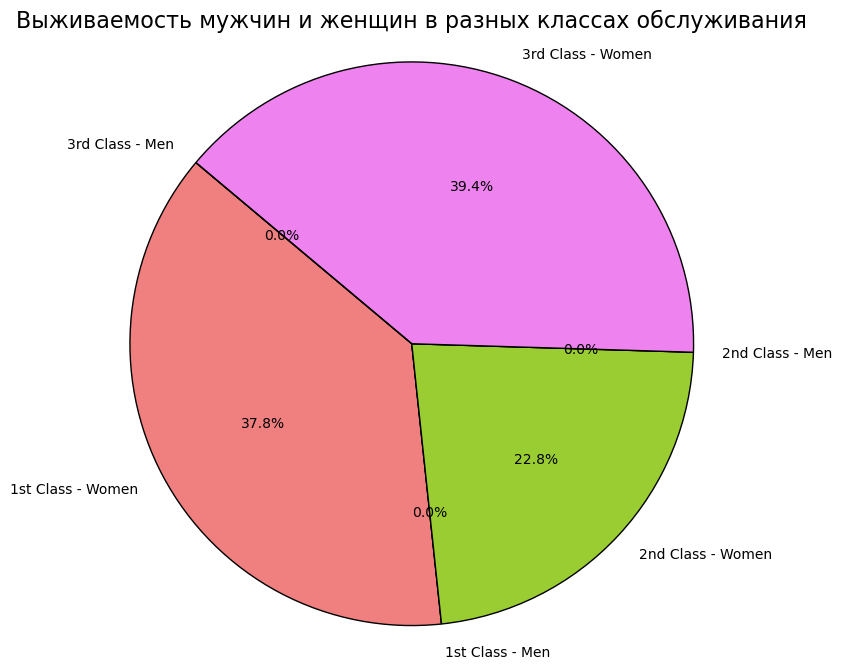

In [33]:
# Группировка данных по классу обслуживания, полу и статусу выживания
survival_counts = df.groupby(['Pclass', 'Sex'])['Survived'].sum().unstack().fillna(0)

# Данные для круговой диаграммы
labels = ['1st Class - Women', '1st Class - Men', '2nd Class - Women', '2nd Class - Men', '3rd Class - Women', '3rd Class - Men']
sizes = [
    survival_counts.loc[1, 'female'], survival_counts.loc[1, 'male'],
    survival_counts.loc[2, 'female'], survival_counts.loc[2, 'male'],
    survival_counts.loc[3, 'female'], survival_counts.loc[3, 'male']
]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'gold', 'violet', 'lightblue'] 

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Выживаемость мужчин и женщин в разных классах обслуживания', fontsize=16)
plt.axis('equal')  # Чтобы круговая диаграмма была круглой

plt.show()